In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [203]:
df = pd.read_csv('sample3.csv', sep=';')
df

full_sq  life_sq  floor  max_floor  material  num_room  kitch_sq  \
0        43.00     27.0    4.0       12.0       1.0       2.0       6.0   
1        34.00     19.0    3.0       12.0       1.0       2.0       6.0   
2        43.00     29.0    2.0       12.0       1.0       2.0       6.0   
3        89.00     50.0    9.0       12.0       1.0       2.0       6.0   
4        77.00     77.0    4.0       12.0       1.0       2.0       6.0   
...        ...      ...    ...        ...       ...       ...       ...   
38128    52.20     31.8   10.0       12.0       5.0       2.0       9.1   
38129    54.09     30.0   14.0        0.0       1.0       2.0       0.0   
38130    41.08      1.0   12.0        1.0       1.0       1.0       1.0   
38131    34.80     19.8    8.0        9.0       5.0       1.0       6.4   
38132    63.00     43.8    5.0        5.0       1.0       3.0       7.1   

       state   product_type                  sub_area  ...  build_count_brick  \
0        2.0     Investment                  Bibirevo  ...                0.0   
1        2.0     Investment         Nagatinskij Zaton  ...               67.0   
2        2.0     Investment            Tekstil'shhiki  ...              206.0   
3        2.0     Investment                    Mitino  ...              124.0   
4        2.0     Investment                 Basmannoe  ...              643.0   
...      ...            ...                       ...  ...                ...   
38128    2.0     Investment                  Kon'kovo  ...                7.0   
38129    2.0  OwnerOccupier    Poselenie Desjonovskoe  ...               68.0   
38130    1.0  OwnerOccupier                  Tverskoe  ...              529.0   
38131    2.0     Investment  Orehovo-Borisovo Juzhnoe  ...                0.0   
38132    3.0     Investment       Chertanovo Severnoe  ...                0.0   

       build_count_monolith  green_zone_part indust_part green_zone_km  \
0                       2.0         0.189727    0.000070      0.600973   
1                       4.0         0.372602    0.049637      0.065321   
2                       4.0         0.112560    0.118537      0.453172   
3                      50.0         0.194703    0.069753      0.106125   
4                      16.0         0.015234    0.037316      0.236214   
...                     ...              ...         ...           ...   
38128                   3.0         0.127002    0.135650      0.199909   
38129                   6.0         0.349935    0.011654      0.991824   
38130                  25.0         0.065444    0.000078      0.189089   
38131                   3.0         0.075790    0.100456      0.766444   
38132                   3.0         0.128123    0.089040      0.143238   

       industrial_km  water_treatment_km  water_km  education_raion  \
0           1.080934           23.683460  0.992631              3.0   
1           0.966479            1.317476  0.698081              3.0   
2           0.939275            4.912660  0.468265              2.6   
3           0.451173           15.623710  1.200336              6.6   
4           0.392871           10.683540  0.820294              7.6   
...              ...                 ...       ...              ...   
38128       0.624466            8.841655  0.219356              3.8   
38129       1.351922            9.211348  0.215268              0.2   
38130       2.640803           10.378040  0.524839             10.4   
38131       0.521349            5.611768  1.394677              3.4   
38132       0.570409            4.922175  0.800876              3.6   

      all_places_km  
0          1.670737  
1          2.147168  
2          1.701709  
3          2.548313  
4          0.812994  
...             ...  
38128      2.007465  
38129      6.116666  
38130      0.715129  
38131      1.861863  
38132      2.208221  

[38133 rows x 42 columns]

In [204]:
df = df.reset_index().rename(columns={"index": "id"})
df.id += 1 
df

id  full_sq  life_sq  floor  max_floor  material  num_room  \
0          1    43.00     27.0    4.0       12.0       1.0       2.0   
1          2    34.00     19.0    3.0       12.0       1.0       2.0   
2          3    43.00     29.0    2.0       12.0       1.0       2.0   
3          4    89.00     50.0    9.0       12.0       1.0       2.0   
4          5    77.00     77.0    4.0       12.0       1.0       2.0   
...      ...      ...      ...    ...        ...       ...       ...   
38128  38129    52.20     31.8   10.0       12.0       5.0       2.0   
38129  38130    54.09     30.0   14.0        0.0       1.0       2.0   
38130  38131    41.08      1.0   12.0        1.0       1.0       1.0   
38131  38132    34.80     19.8    8.0        9.0       5.0       1.0   
38132  38133    63.00     43.8    5.0        5.0       1.0       3.0   

       kitch_sq  state   product_type  ... build_count_brick  \
0           6.0    2.0     Investment  ...               0.0   
1           6.0    2.0     Investment  ...              67.0   
2           6.0    2.0     Investment  ...             206.0   
3           6.0    2.0     Investment  ...             124.0   
4           6.0    2.0     Investment  ...             643.0   
...         ...    ...            ...  ...               ...   
38128       9.1    2.0     Investment  ...               7.0   
38129       0.0    2.0  OwnerOccupier  ...              68.0   
38130       1.0    1.0  OwnerOccupier  ...             529.0   
38131       6.4    2.0     Investment  ...               0.0   
38132       7.1    3.0     Investment  ...               0.0   

       build_count_monolith  green_zone_part  indust_part green_zone_km  \
0                       2.0         0.189727     0.000070      0.600973   
1                       4.0         0.372602     0.049637      0.065321   
2                       4.0         0.112560     0.118537      0.453172   
3                      50.0         0.194703     0.069753      0.106125   
4                      16.0         0.015234     0.037316      0.236214   
...                     ...              ...          ...           ...   
38128                   3.0         0.127002     0.135650      0.199909   
38129                   6.0         0.349935     0.011654      0.991824   
38130                  25.0         0.065444     0.000078      0.189089   
38131                   3.0         0.075790     0.100456      0.766444   
38132                   3.0         0.128123     0.089040      0.143238   

      industrial_km  water_treatment_km  water_km  education_raion  \
0          1.080934           23.683460  0.992631              3.0   
1          0.966479            1.317476  0.698081              3.0   
2          0.939275            4.912660  0.468265              2.6   
3          0.451173           15.623710  1.200336              6.6   
4          0.392871           10.683540  0.820294              7.6   
...             ...                 ...       ...              ...   
38128      0.624466            8.841655  0.219356              3.8   
38129      1.351922            9.211348  0.215268              0.2   
38130      2.640803           10.378040  0.524839             10.4   
38131      0.521349            5.611768  1.394677              3.4   
38132      0.570409            4.922175  0.800876              3.6   

       all_places_km  
0           1.670737  
1           2.147168  
2           1.701709  
3           2.548313  
4           0.812994  
...              ...  
38128       2.007465  
38129       6.116666  
38130       0.715129  
38131       1.861863  
38132       2.208221  

[38133 rows x 43 columns]

In [205]:
train_pos = 30471

## Square of rooms

<AxesSubplot:>

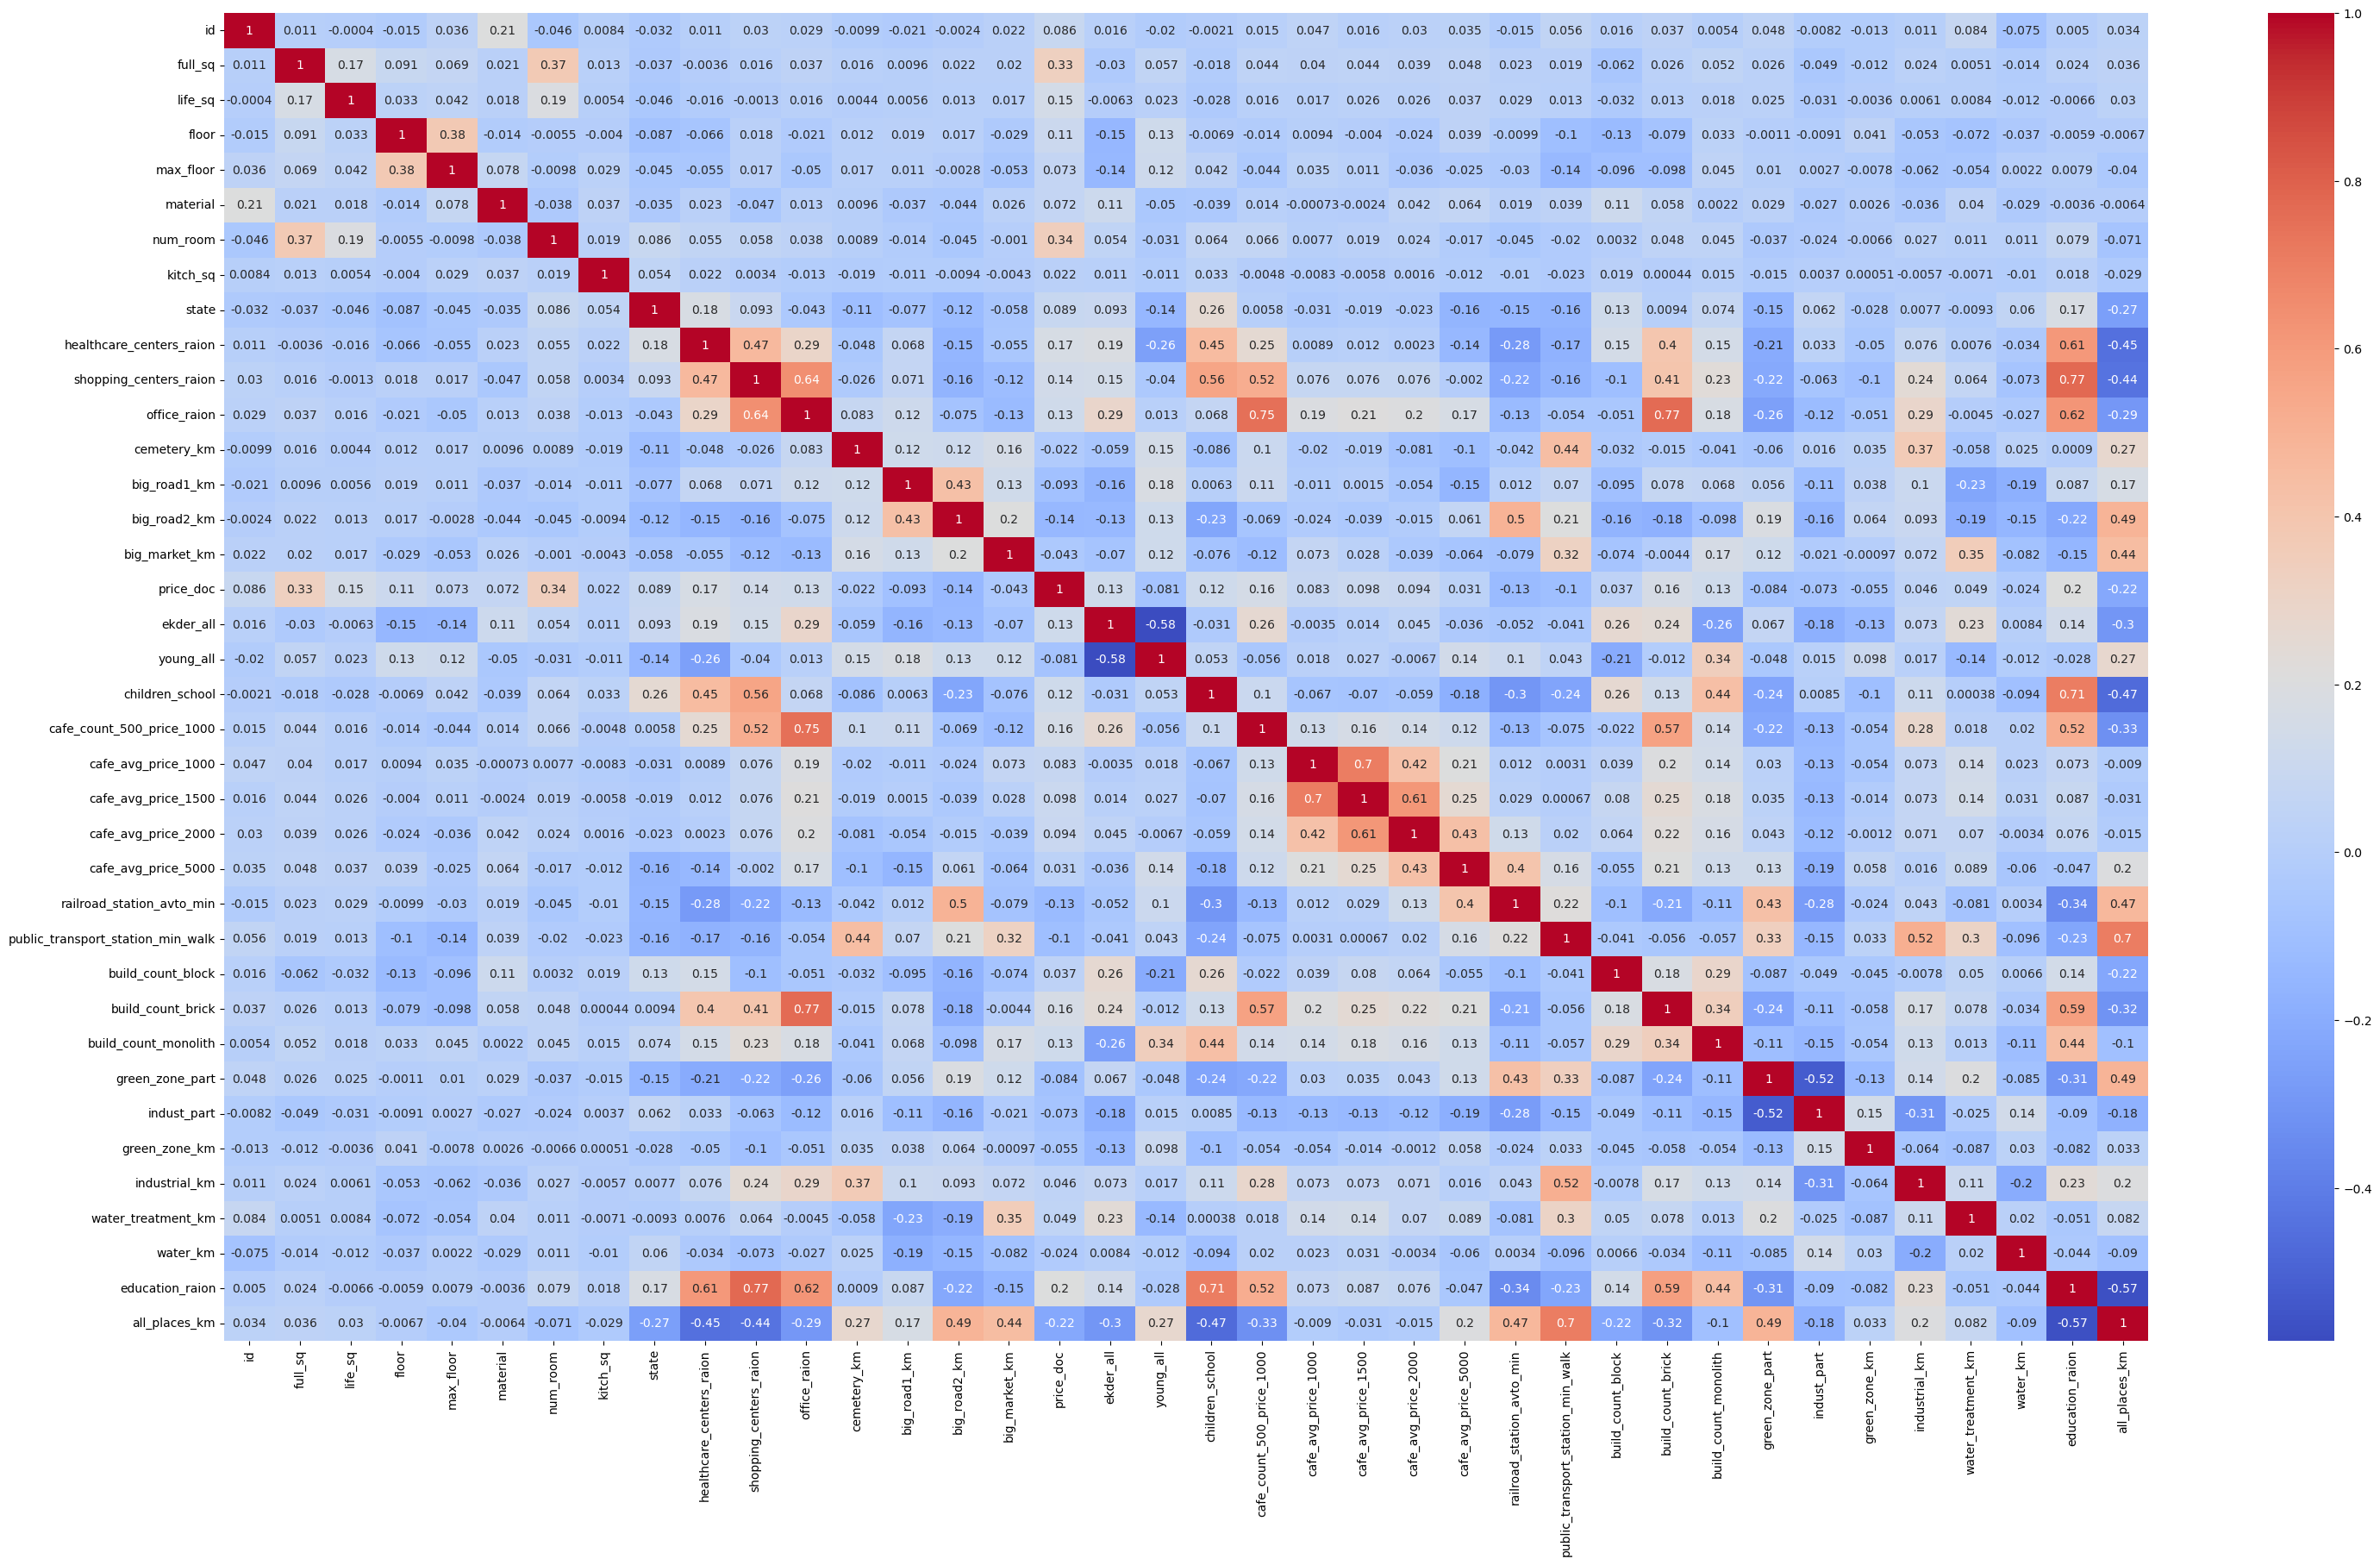

In [206]:
f, ax = plt.subplots(figsize=(36, 20))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [207]:
df.drop(df[df.full_sq < df.life_sq + df.kitch_sq].index, inplace=True)

In [208]:
df['life_sq'] = df['life_sq']  / df['full_sq']
df['kitch_sq'] = df['kitch_sq']  / df['full_sq']

In [209]:
df.drop("full_sq", axis=1, inplace=True)

## Drop usless columns. Group same columns

<AxesSubplot:>

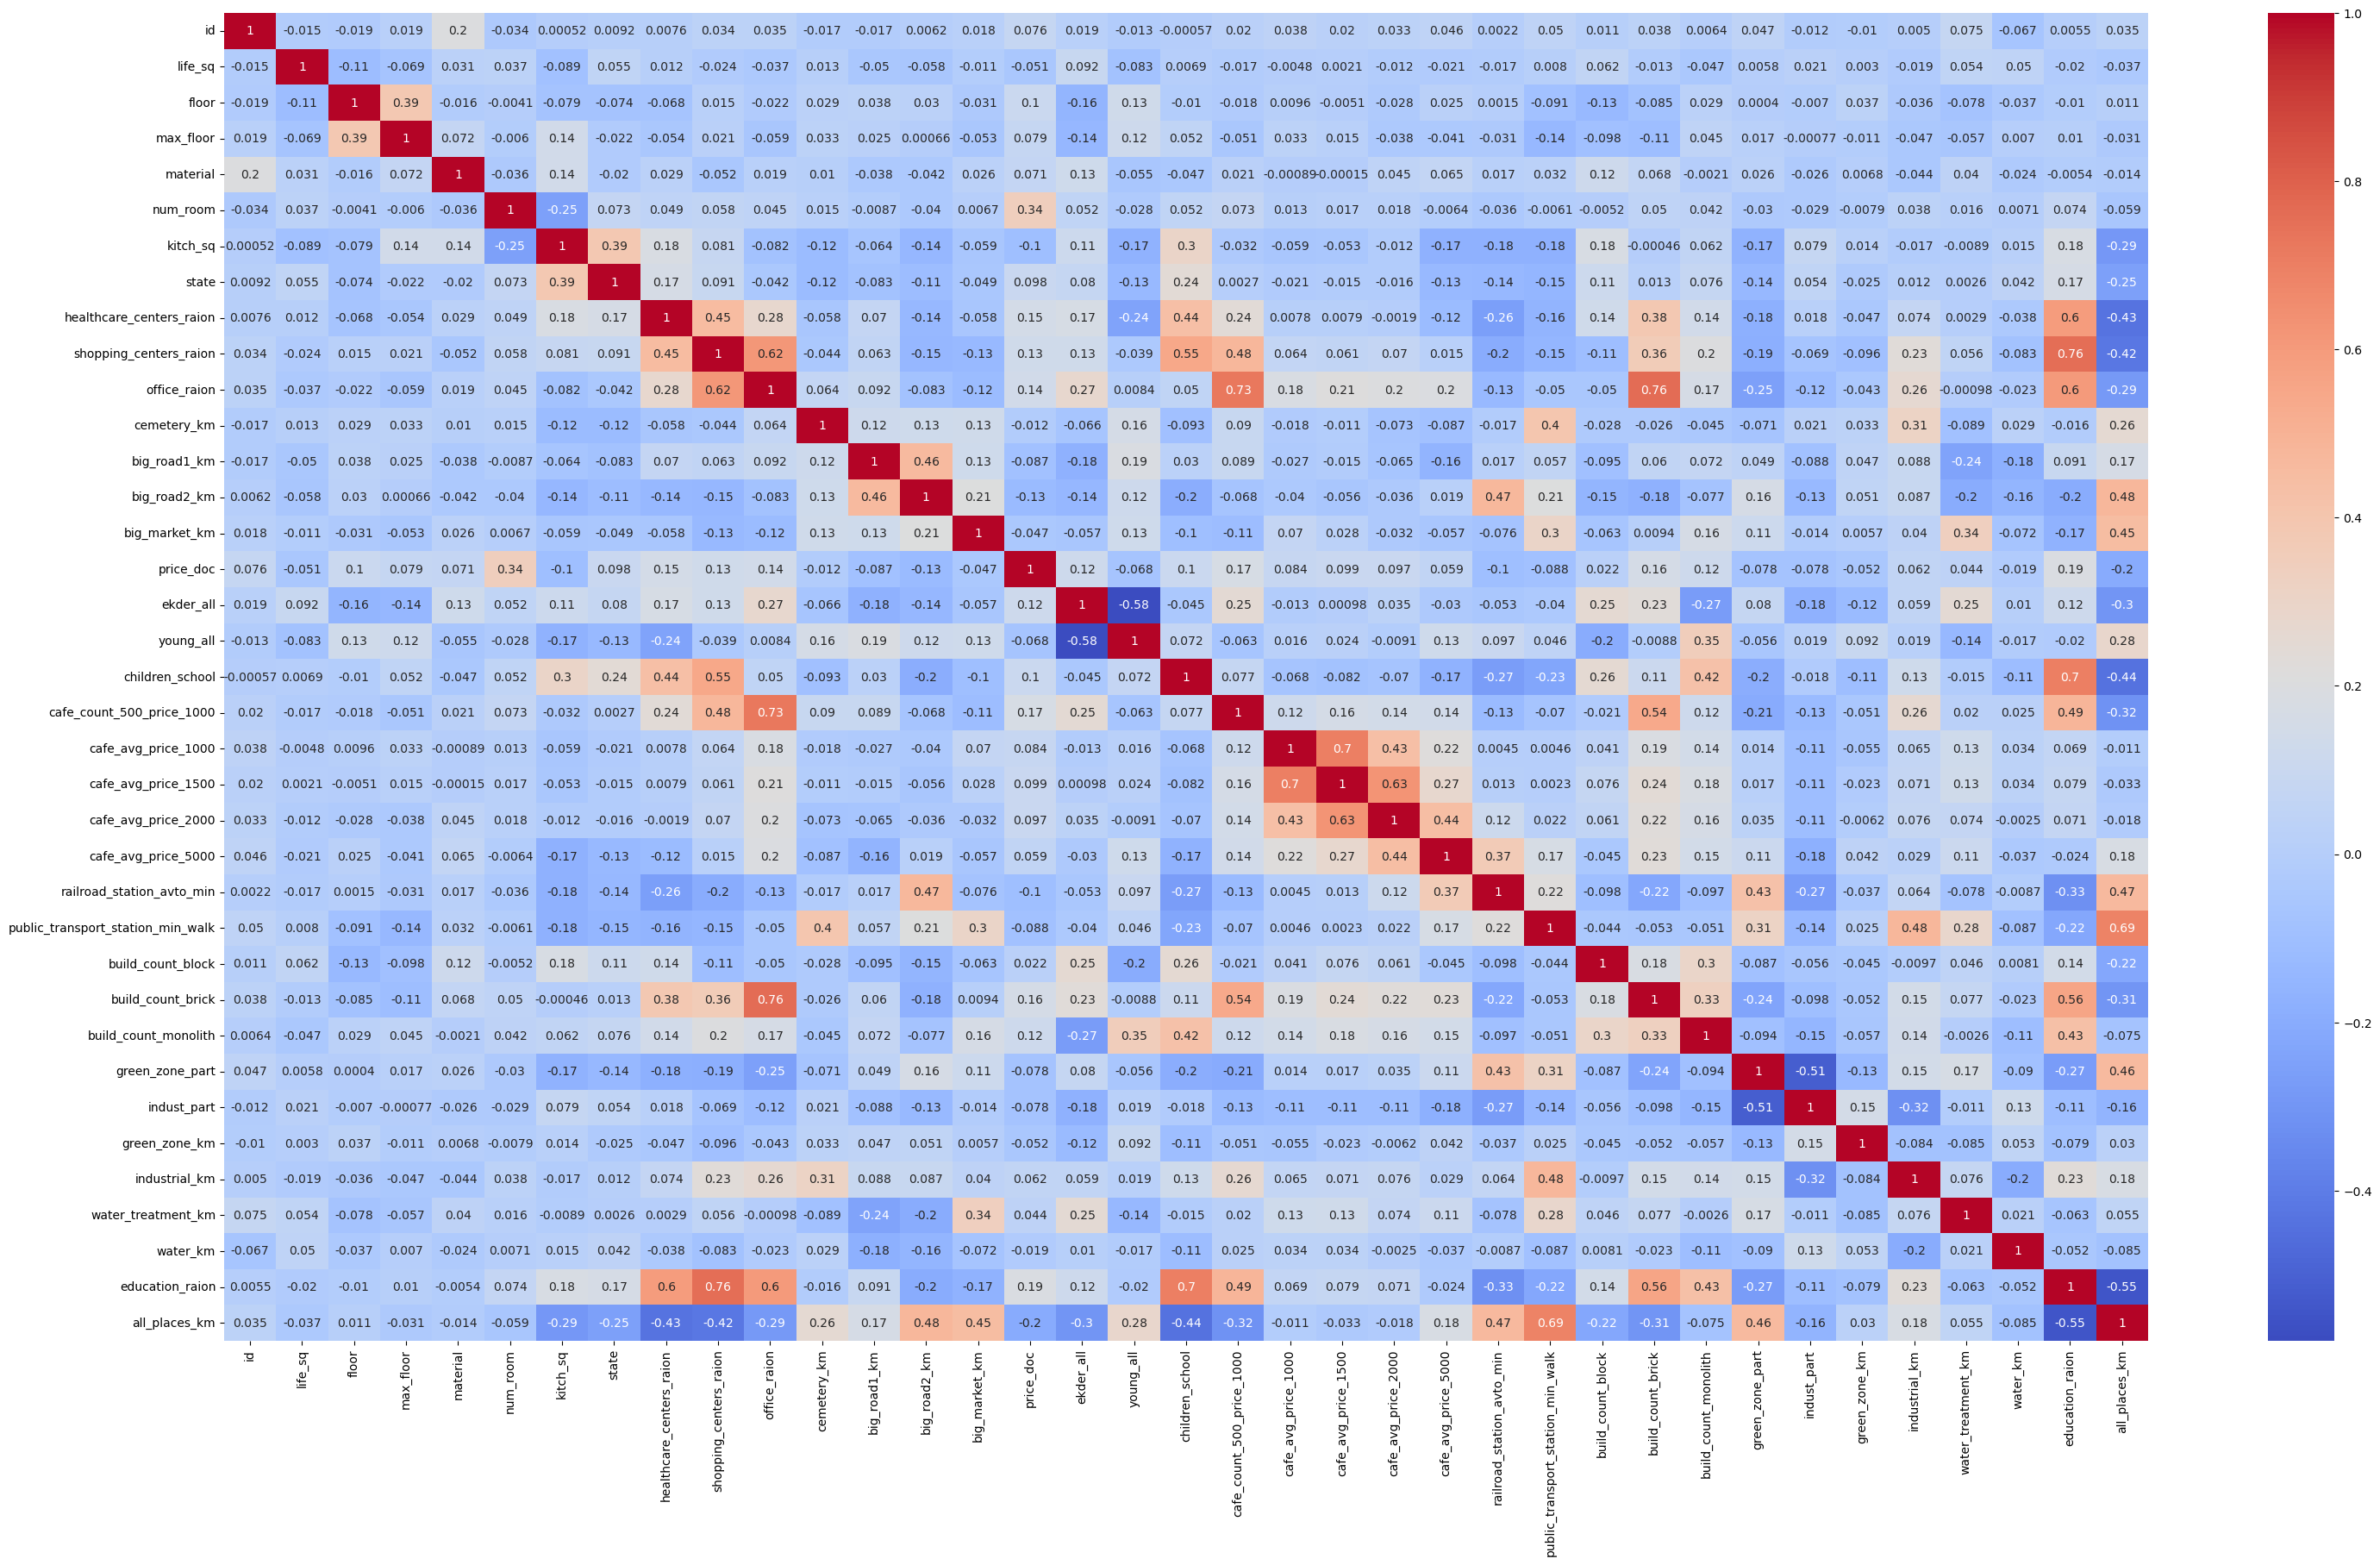

In [210]:
f, ax = plt.subplots(figsize=(36, 20))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [211]:
corr_matrix['price_doc']['children_school'] < corr_matrix['price_doc']['education_raion']

True

In [212]:
df.drop('children_school', axis=1, inplace=True)

In [213]:
df.drop('cafe_count_500_price_1000', axis=1, inplace=True)

In [214]:
cafe_cols = df.columns[df.columns.str.contains('cafe')]
cafe_cols

Index(['cafe_avg_price_1000', 'cafe_avg_price_1500', 'cafe_avg_price_2000',
       'cafe_avg_price_5000'],
      dtype='object')

In [215]:
df['cafe_nearest'] = 0 

for col in cafe_cols:
    df['cafe_nearest'] += df[col] 

df['cafe_nearest'] /= len(cafe_cols)
df.drop(columns=cafe_cols, axis=1,inplace=True)

<AxesSubplot:>

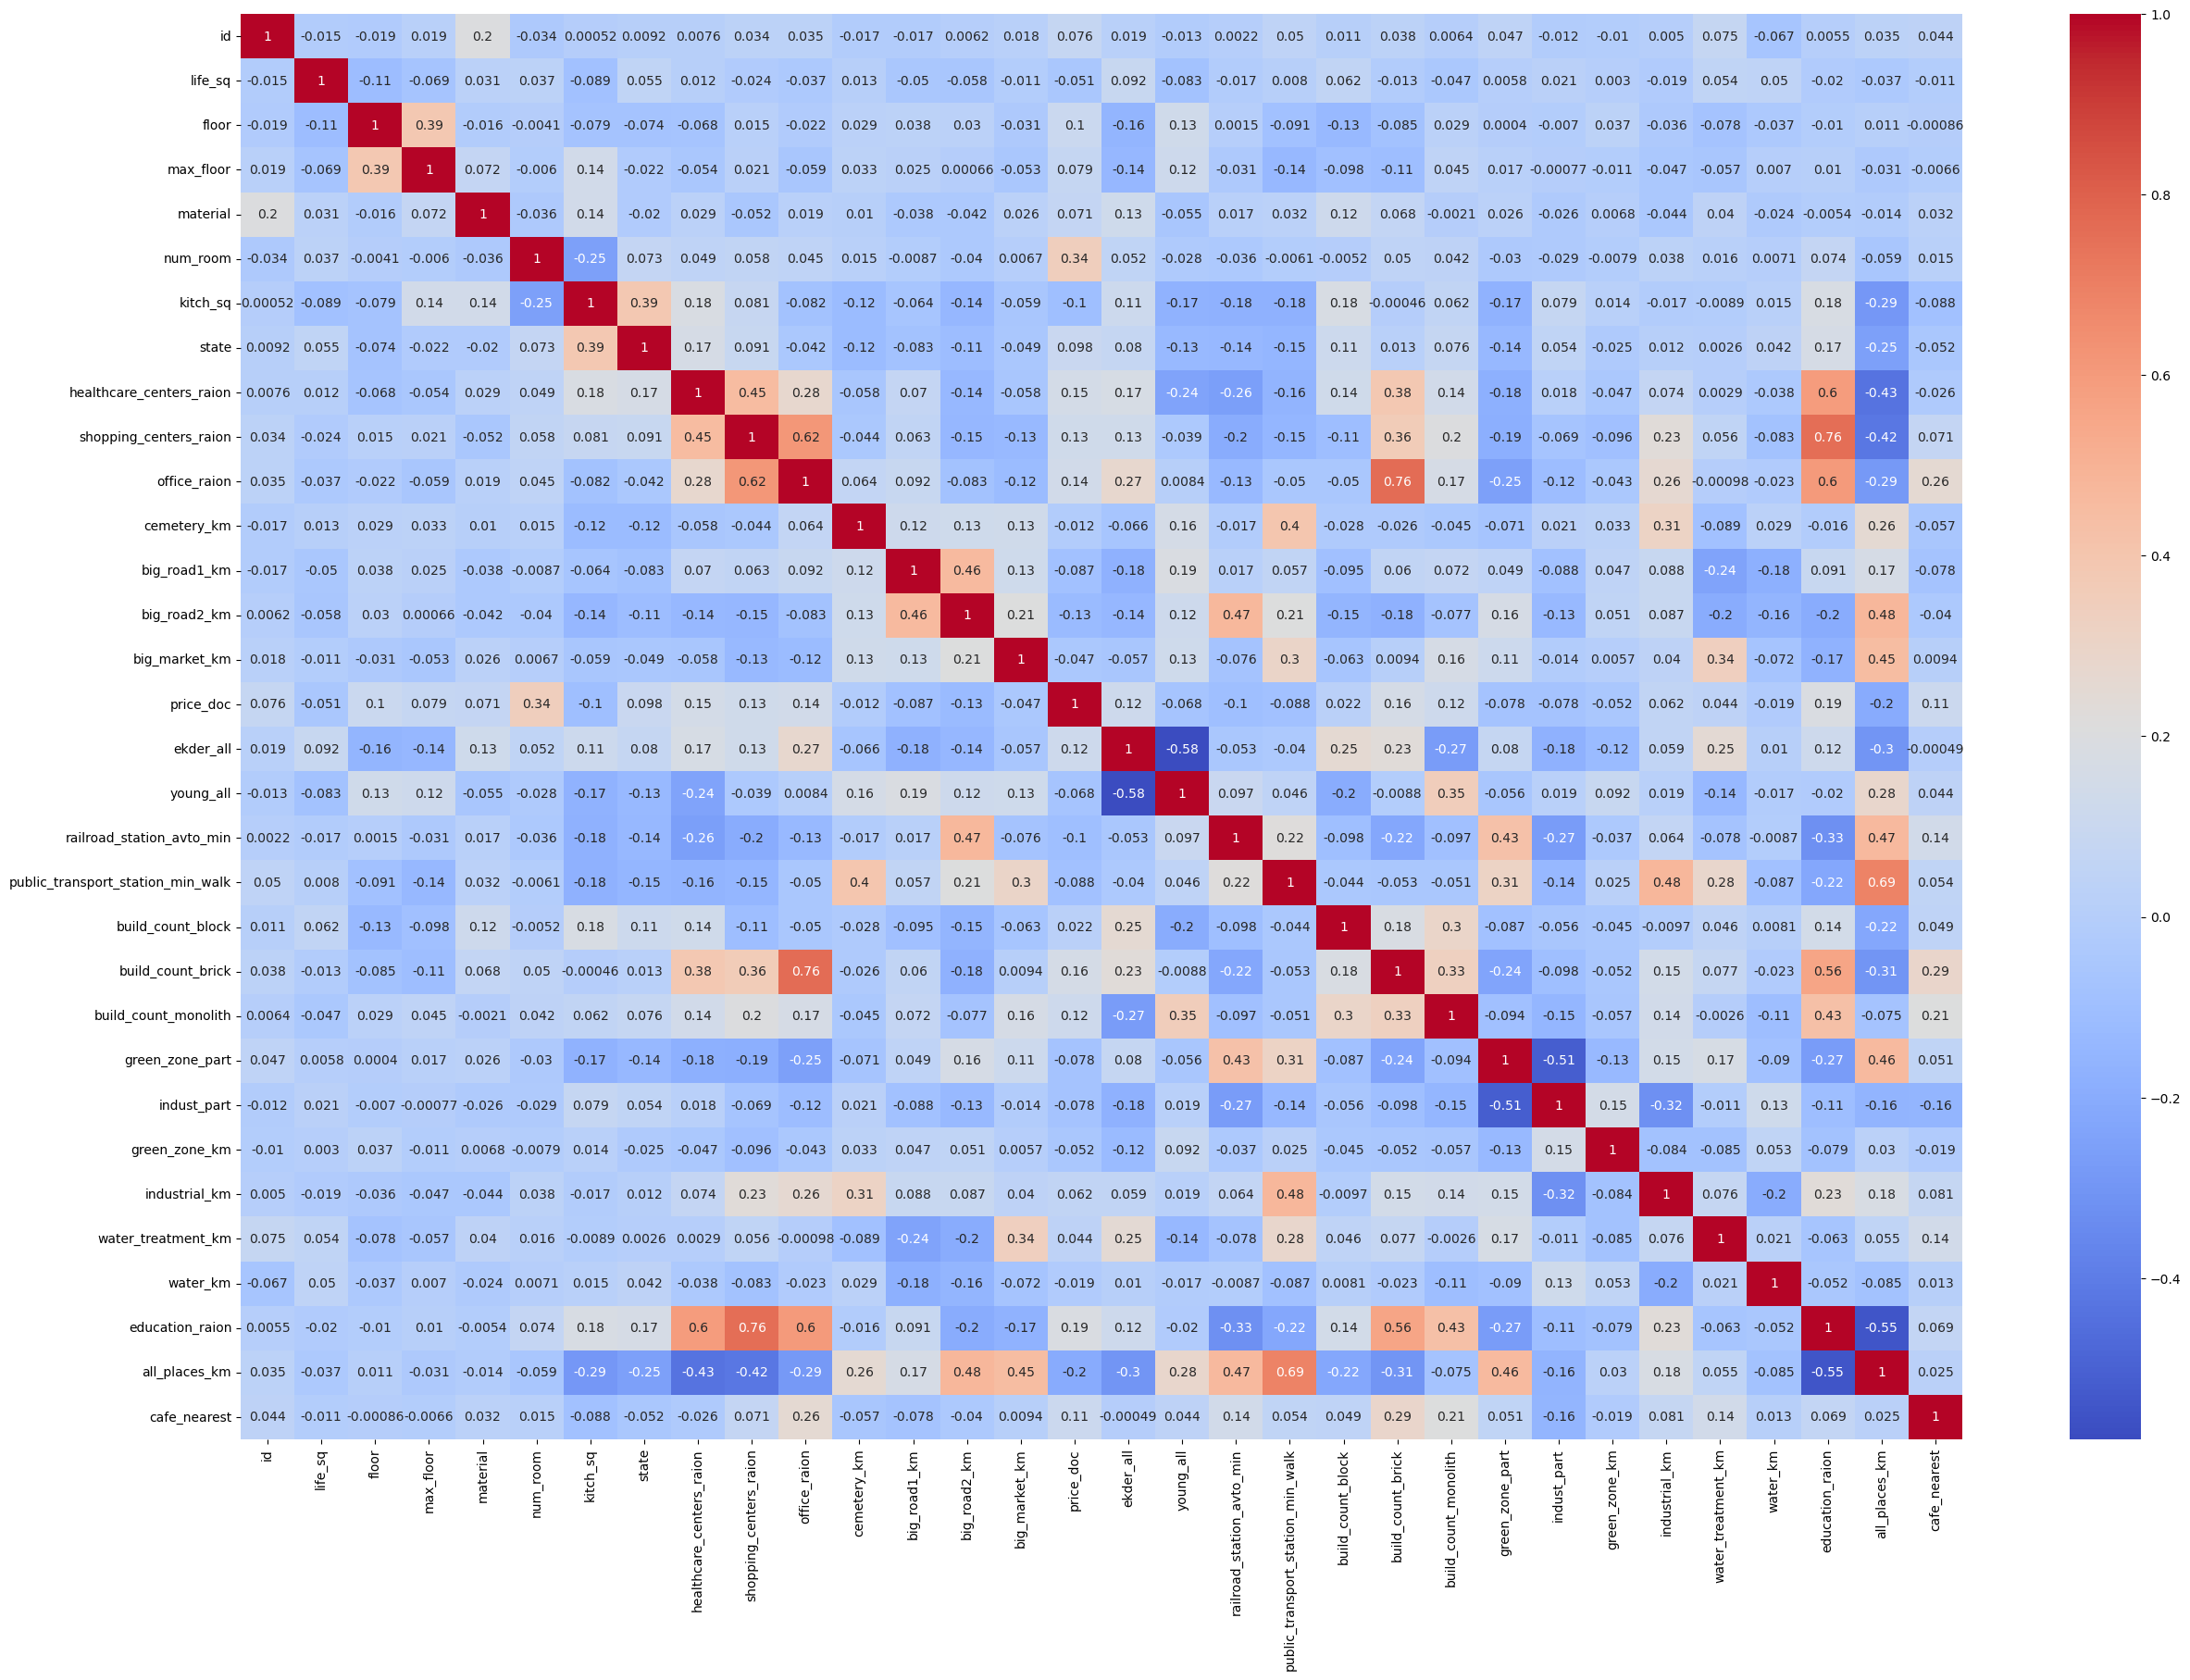

In [216]:
f, ax = plt.subplots(figsize=(30, 20))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [217]:
raions_col = df.columns[df.columns.str.contains('(health|educ|shop|office)')]
raions_col

C:\Users\User\AppData\Local\Temp\ipykernel_6692\2814927558.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  raions_col = df.columns[df.columns.str.contains('(health|educ|shop|office)')]


Index(['healthcare_centers_raion', 'shopping_centers_raion', 'office_raion',
       'education_raion'],
      dtype='object')

In [218]:
df['sociality_raion'] = 0 

for col in raions_col:
    df['sociality_raion'] += df[col] 

df['sociality_raion'] /= len(raions_col)
df.drop(columns=raions_col, axis=1,inplace=True)

<AxesSubplot:>

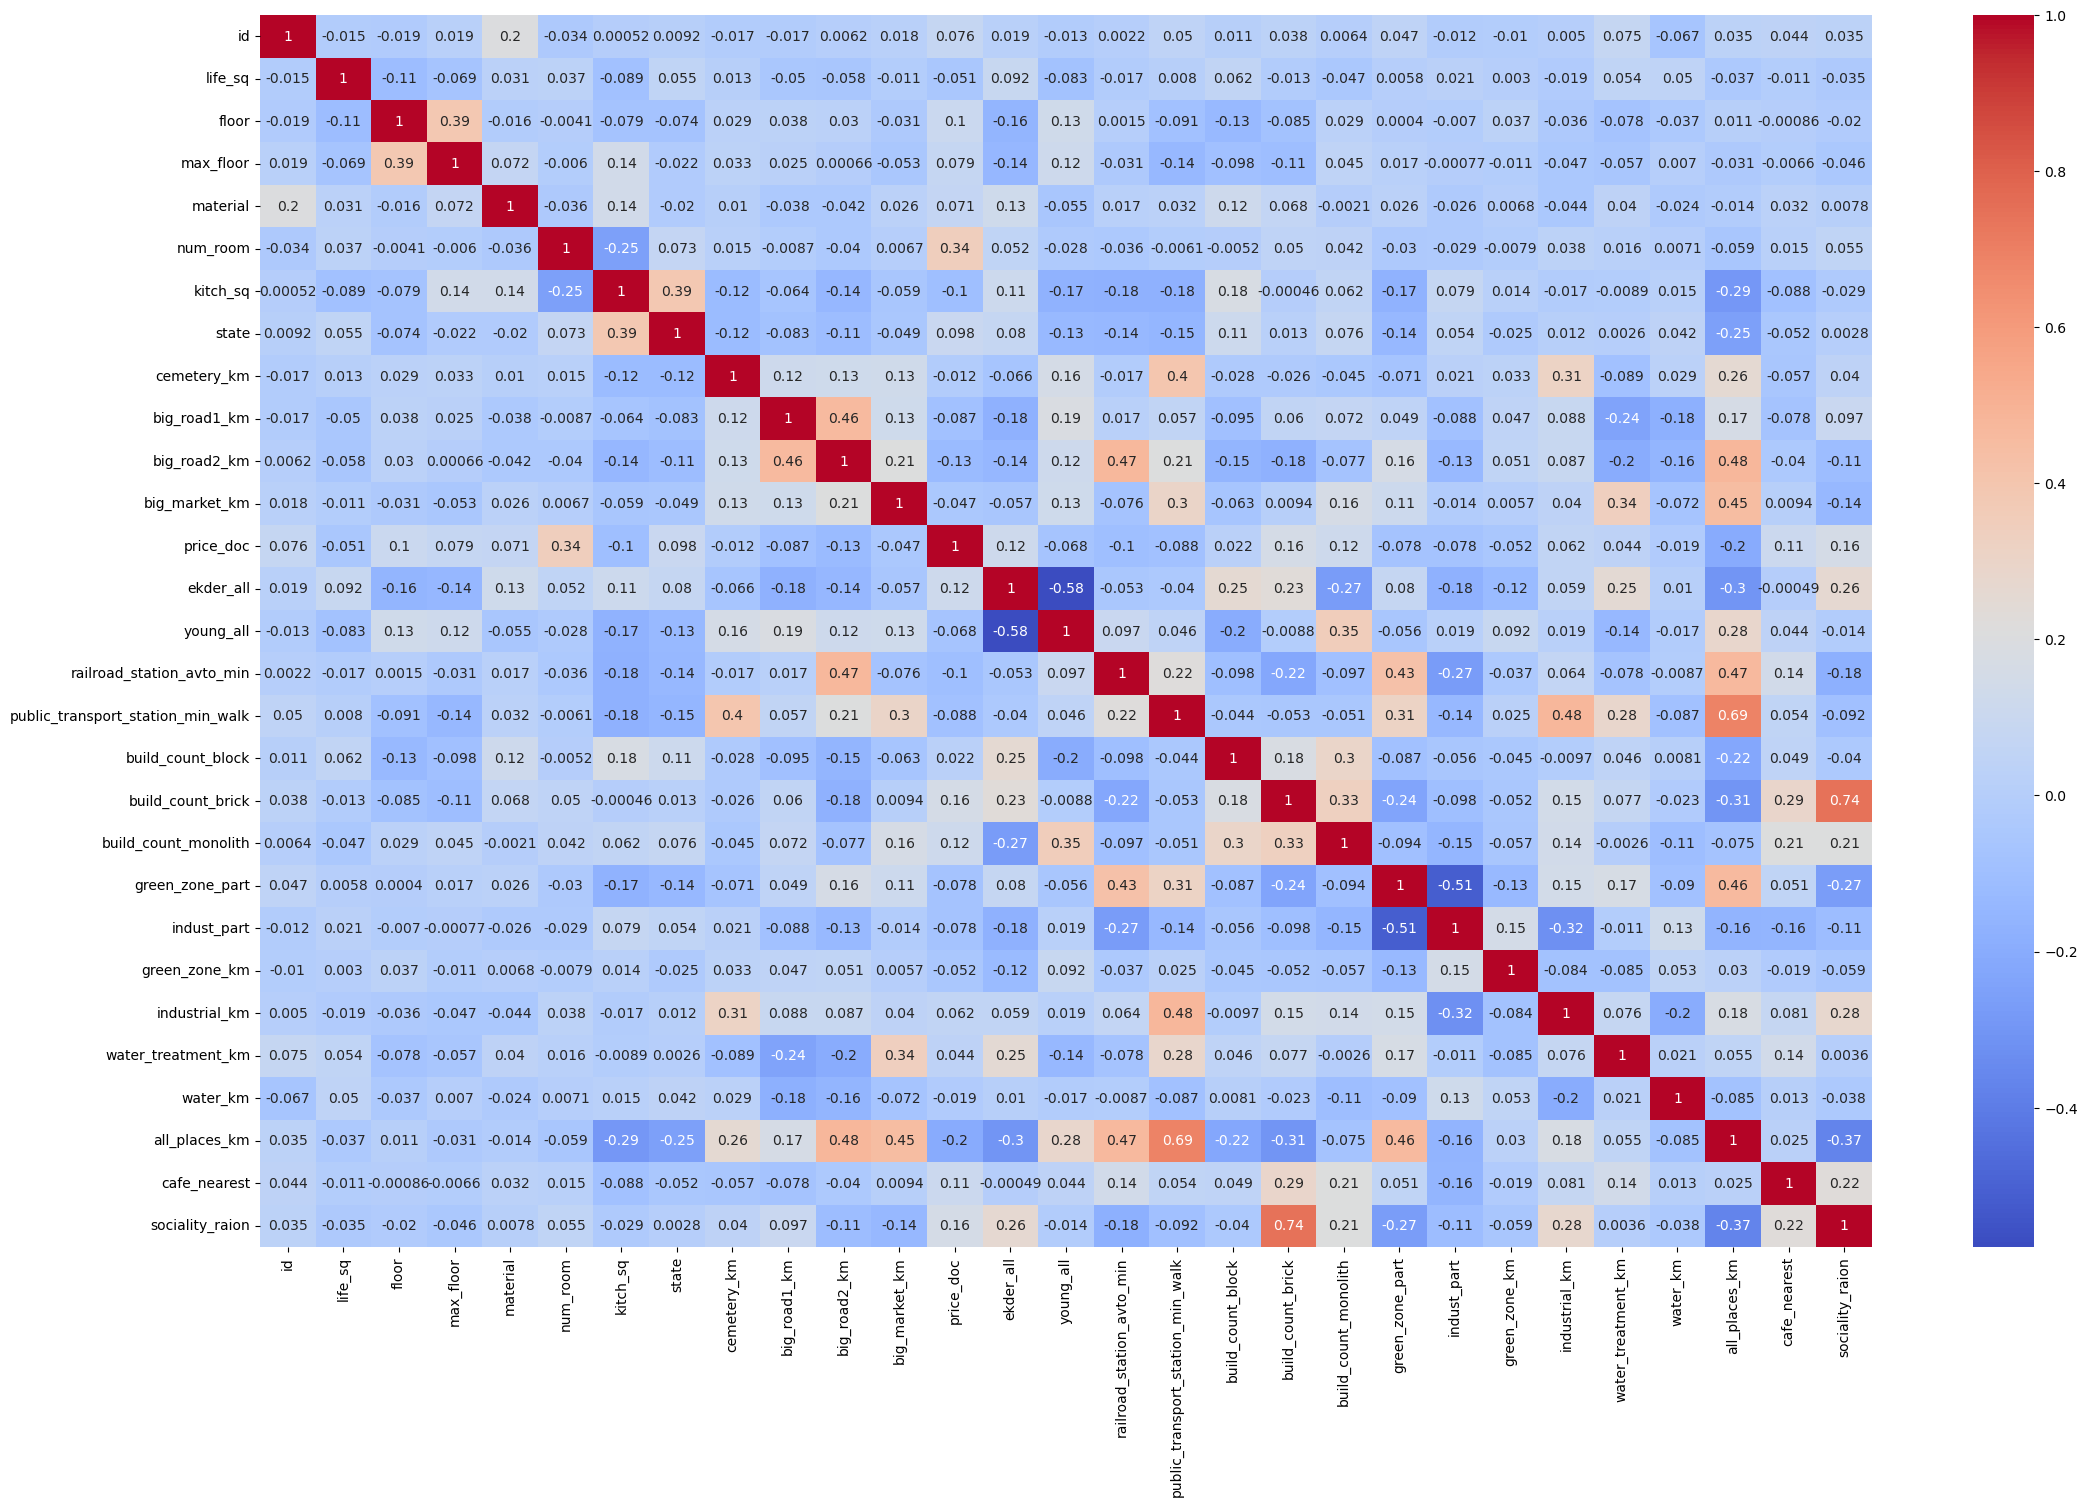

In [219]:
f, ax = plt.subplots(figsize=(26, 16))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [220]:
corr_matrix['price_doc']['build_count_brick'] < corr_matrix['price_doc']['sociality_raion']

True

In [221]:
df.drop(columns=['build_count_brick'], axis=1,inplace=True)

## Delete outliers, explore normality 

source: https://proglib.io/p/moem-dataset-rukovodstvo-po-ochistke-dannyh-v-python-2020-03-27

source: https://www.theanalysisfactor.com/anatomy-of-a-normal-probability-plot/

source: https://proglib.io/p/postroenie-i-otbor-priznakov-chast-1-feature-engineering-2021-09-15

In [222]:
numeric_col = train.columns[(train.dtypes != 'object') & (train.columns != 'price_doc')][1:]
numeric_col

Index(['floor', 'max_floor', 'material', 'num_room', 'kitch_sq', 'state',
       'cemetery_km', 'big_road1_km', 'big_road2_km', 'big_market_km',
       ...
       'sub_area_Zjuzino', 'radiation_raion_no', 'radiation_raion_yes',
       'detention_facility_raion_no', 'detention_facility_raion_yes',
       'ecology_excellent', 'ecology_good', 'ecology_no data', 'ecology_poor',
       'ecology_satisfactory'],
      dtype='object', length=182)

In [223]:
df.drop(df[df.floor > df.max_floor].index,inplace=True)

In [224]:
df.drop(df[(df.price_doc > df.price_doc.quantile(.95)) | (df.price_doc < df.price_doc.quantile(.05))].index, inplace=True)

In [225]:
def delete_outliers(df, col):
    upper_lim = df[col].quantile(.95)
    lower_lim = df[col].quantile(.05)
    df.loc[(df[col] > upper_lim),col] = upper_lim
    df.loc[(df[col] < lower_lim),col] = lower_lim

In [226]:
for col in numeric_col:
    delete_outliers(train, col)

In [227]:
df.shape

(27864, 33)

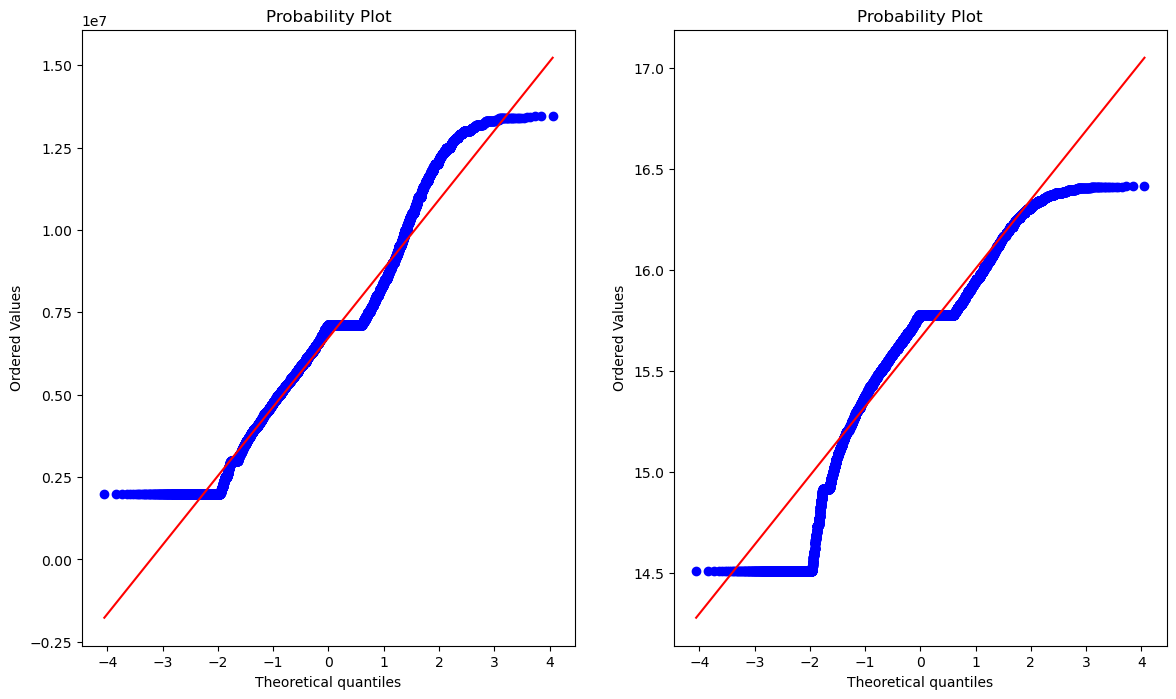

In [228]:
fig = plt.figure(figsize = (14,8))

fig.add_subplot(1,2,1)
res = stats.probplot(df['price_doc'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df['price_doc']), plot=plt)

In [229]:
df['price_doc'] = np.log1p(df['price_doc'])

find max correlation with target

## Convert categorical values to numeric

In [230]:
category_col = df.columns[df.dtypes == 'object']
category_col

Index(['product_type', 'sub_area', 'radiation_raion',
       'detention_facility_raion', 'ecology'],
      dtype='object')

In [231]:
encoded_columns = pd.get_dummies(df[category_col])

In [232]:
df = df.join(encoded_columns).drop(columns=category_col, axis=1)

## Clean

In [233]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [234]:
clean_dataset(df)

id   life_sq  floor  max_floor  material  num_room  kitch_sq  \
0          1.0  0.627907    4.0       12.0       1.0       2.0  0.139535   
1          2.0  0.558824    3.0       12.0       1.0       2.0  0.176471   
2          3.0  0.674419    2.0       12.0       1.0       2.0  0.139535   
3          4.0  0.561798    9.0       12.0       1.0       2.0  0.067416   
6          7.0  0.560000   10.0       12.0       1.0       2.0  0.240000   
...        ...       ...    ...        ...       ...       ...       ...   
38126  38127.0  0.023992   13.0       17.0       1.0       1.0  0.023992   
38127  38128.0  0.019889    3.0       17.0       1.0       1.0  0.019889   
38128  38129.0  0.609195   10.0       12.0       5.0       2.0  0.174330   
38131  38132.0  0.568966    8.0        9.0       5.0       1.0  0.183908   
38132  38133.0  0.695238    5.0        5.0       1.0       3.0  0.112698   

       state  cemetery_km  big_road1_km  ...  sub_area_Zjuzino  \
0        2.0     1.804127      1.422391  ...               0.0   
1        2.0     4.655004      2.887377  ...               0.0   
2        2.0     3.381083      0.647250  ...               0.0   
3        2.0     2.017080      2.677824  ...               0.0   
6        2.0     1.371596      2.026623  ...               0.0   
...      ...          ...           ...  ...               ...   
38126    1.0     2.688263      1.426600  ...               0.0   
38127    1.0     1.977045      1.316289  ...               0.0   
38128    2.0     4.452060      3.042145  ...               0.0   
38131    2.0     1.856325      1.425847  ...               0.0   
38132    3.0     1.775991      0.418628  ...               0.0   

       radiation_raion_no  radiation_raion_yes  detention_facility_raion_no  \
0                     1.0                  0.0                          1.0   
1                     1.0                  0.0                          1.0   
2                     0.0                  1.0                          1.0   
3                     1.0                  0.0                          1.0   
6                     1.0                  0.0                          0.0   
...                   ...                  ...                          ...   
38126                 1.0                  0.0                          1.0   
38127                 1.0                  0.0                          1.0   
38128                 0.0                  1.0                          1.0   
38131                 1.0                  0.0                          1.0   
38132                 1.0                  0.0                          1.0   

       detention_facility_raion_yes  ecology_excellent  ecology_good  \
0                               0.0                0.0           1.0   
1                               0.0                1.0           0.0   
2                               0.0                0.0           0.0   
3                               0.0                0.0           1.0   
6                               1.0                0.0           0.0   
...                             ...                ...           ...   
38126                           0.0                0.0           0.0   
38127                           0.0                0.0           0.0   
38128                           0.0                0.0           0.0   
38131                           0.0                0.0           0.0   
38132                           0.0                0.0           0.0   

       ecology_no data  ecology_poor  ecology_satisfactory  
0                  0.0           0.0                   0.0  
1                  0.0           0.0                   0.0  
2                  0.0           1.0                   0.0  
3                  0.0           0.0                   0.0  
6                  0.0           1.0                   0.0  
...                ...           ...                   ...  
38126              1.0           0.0                   0.0  
3812

## Standartize data

In [235]:
from sklearn.preprocessing import StandardScaler

In [236]:
train = df[df.id <= train_pos].copy()
test = df[df.id > train_pos].copy()

In [237]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)

In [238]:
y_train = train['price_doc'].copy()
x_train = train.drop('price_doc', axis=1)

In [239]:
y_test = test['price_doc'].copy()
x_test = test.drop('price_doc', axis=1)

In [240]:
scaler = StandardScaler()

In [241]:
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [242]:
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

## Linear regression

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [244]:
reg = LinearRegression()

In [245]:
reg.fit(x_train, y_train)

LinearRegression()

In [246]:
y_pred = reg.predict(x_test)

In [247]:
mse = mean_squared_error(y_test, y_pred)

In [248]:
print('Mean Squared Error:', mse)

Mean Squared Error: 5.418305090415585e+23


In [249]:
score = reg.score(x_test, y_test)

In [250]:
print('Score:', score)

Score: -1.0732058906382792e+52


## Random rainforest

In [251]:
from sklearn.ensemble import RandomForestRegressor

In [252]:
forest = RandomForestRegressor()

In [253]:
forest.fit(x_train, y_train)

RandomForestRegressor()

In [255]:
y_pred = forest.predict(x_test)

In [256]:
mse = mean_squared_error(y_test, y_pred)

In [257]:
print('Mean Squared Error:', mse)

Mean Squared Error: 0.07633451981079337


In [254]:
forest.score(x_test, y_test)

-1.511960935254467e+27

## New model

https://question-it.com/questions/1160474/otritsatelnaja-tochnost-linejnoj-regressii

In [258]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

In [259]:
regressor = LinearRegression()

In [ ]:

lr = TransformedTargetRegressor(
        regressor=regressor, 
        func=np.log, inverse_func=np.exp)